In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

from src.Agent import PPOAgent

## 1) Testing architecture w. individual Policy and Value net:

In [7]:
rng_seed = 0
env = gym.make('CartPole-v1')

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

gamma = 0.99
lmbda = 0.925
epsilon = 0.2  
policy_lr = 0.001
value_lr = 0.001
multihead_lr = 0.001
num_policy_epochs = 5
num_value_epochs = 5
num_multihead_epochs = 5
smoothing_const = 1e-8
normalize_advantages = True
batch_size = 32
shuffle_batches = False
max_game_length = 5000
architecture = "Individual Networks"


Agent = PPOAgent(env=env,
                 state_space_size=input_dim,
                 action_space_size=output_dim,
                 gamma=gamma,
                 lmbda=lmbda,
                 epsilon=epsilon,
                 smooting_const=smoothing_const,
                 normalize_advantages=normalize_advantages,
                 batch_size=batch_size,
                 max_game_length=max_game_length,
                 shuffle_batches = shuffle_batches,
                 architecture=architecture,
                 seed=rng_seed)

In [8]:
# Trying to interact w. env. before training
Agent.play(render=False)

####################################
# --- Survived for: 11 episodes --- #
####################################


In [9]:
num_episodes = 87
if architecture == "Individual Networks":
    avg_accumulated_rewards, avg_value_net_loss, avg_policy_net_loss = Agent.train(episodes=num_episodes,
                                                                                   policy_lr=policy_lr,
                                                                                   value_lr=value_lr,
                                                                                   num_policy_epochs=num_policy_epochs,
                                                                                   num_value_epochs=num_value_epochs)
elif architecture == "Multi Head Network":
    avg_accumulated_rewards, avg_multihead_net_loss = Agent.train(episodes=num_episodes,
                                                                  multihead_lr=multihead_lr,
                                                                  num_multihead_epochs=num_multihead_epochs)
    

100%|██████████| 87/87 [00:48<00:00,  1.79it/s]


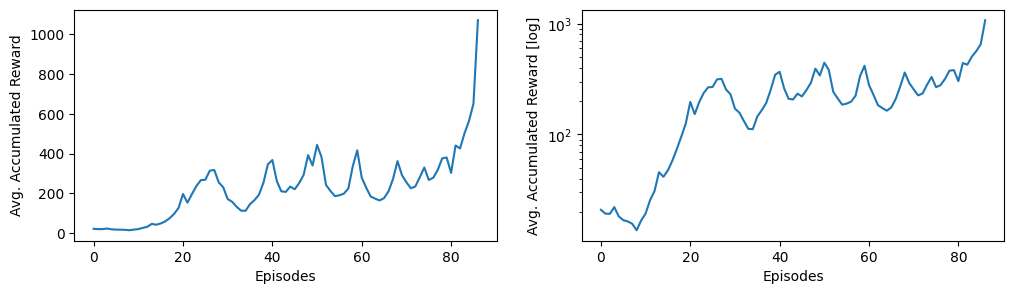

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,3))
ax[0].plot([e for e in range(len(avg_accumulated_rewards))], avg_accumulated_rewards)
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Avg. Accumulated Reward')

ax[1].plot([e for e in range(len(avg_accumulated_rewards))], avg_accumulated_rewards)
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Avg. Accumulated Reward [log]')

ax[1].set_yscale('log')
plt.show()

In [11]:
# Trying to interact w. env. after training
Agent.play(render=False)

####################################
# --- Survived for: 2312 episodes --- #
####################################


## 2) Testing architecture w. common backbone network w. Policy and Value heads:

In [12]:
architecture = "Multi Head Network"


Agent = PPOAgent(env=env,
                 state_space_size=input_dim,
                 action_space_size=output_dim,
                 gamma=gamma,
                 lmbda=lmbda,
                 epsilon=epsilon,
                 smooting_const=smoothing_const,
                 normalize_advantages=normalize_advantages,
                 batch_size=batch_size,
                 max_game_length=max_game_length,
                 shuffle_batches = shuffle_batches,
                 architecture=architecture,
                 seed=rng_seed)

In [13]:
# Trying to interact w. env. before training
Agent.play(render=False)

####################################
# --- Survived for: 8 episodes --- #
####################################


In [14]:
num_episodes = 87
if architecture == "Individual Networks":
    avg_accumulated_rewards, avg_value_net_loss, avg_policy_net_loss = Agent.train(episodes=num_episodes,
                                                                                   policy_lr=policy_lr,
                                                                                   value_lr=value_lr,
                                                                                   num_policy_epochs=num_policy_epochs,
                                                                                   num_value_epochs=num_value_epochs)
elif architecture == "Multi Head Network":
    avg_accumulated_rewards, avg_multihead_net_loss = Agent.train(episodes=num_episodes,
                                                                  multihead_lr=multihead_lr,
                                                                  num_multihead_epochs=num_multihead_epochs)
    

100%|██████████| 87/87 [02:13<00:00,  1.54s/it]


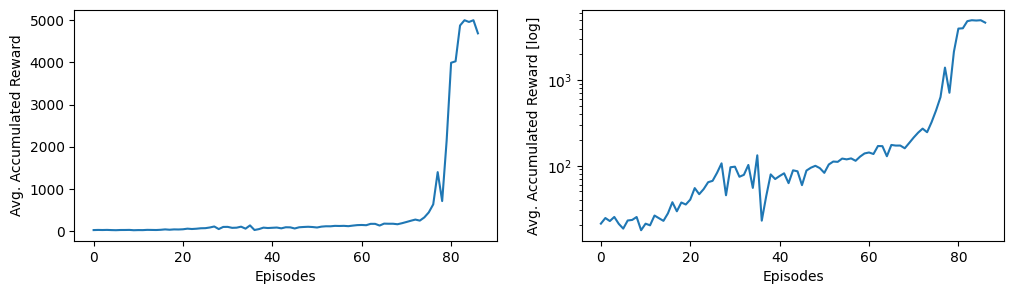

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,3))
ax[0].plot([e for e in range(len(avg_accumulated_rewards))], avg_accumulated_rewards)
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Avg. Accumulated Reward')

ax[1].plot([e for e in range(len(avg_accumulated_rewards))], avg_accumulated_rewards)
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Avg. Accumulated Reward [log]')

ax[1].set_yscale('log')
plt.show()

In [16]:
# Trying to interact w. env. after training
Agent.play(render=False)

KeyboardInterrupt: 